# FRENCH-FRENCH DATASET

## Preprocessing

In [2]:
import pandas as pd

# Load the Excel file into df_ff
file_path = "/kaggle/input/french-proposed-activities/proposition_FF.xlsx"
df_ff = pd.read_excel(file_path)

# Display the first few rows to verify
print(df_ff.head())


   code_pro   wilaya                   field  \
0  P6B3R8CC  Algiers                     NaN   
1  TLLSNCC9  Algiers  Services à la personne   
2  U6HRYAKP     Oran  Services à la personne   
3  HGULM2HM  Algiers  Services à la personne   
4  93ND4KRW  Algiers  Services à la personne   

                                            activity  \
0  Technicien de Maintenance du matériel Prépress...   
1  Dessinateur projeteur en travaux publics et su...   
2                                                Btp   
3                                         Menuiserie   
4                                           Dortoirs   

                                         description  
0  Le service Prépresse est équipé des machines C...  
1  dessinateur projeteur en travaux publics (bâti...  
2                  Tout type de revêtement..peinture  
3  Fabrication de meubles modernes_x000D_\nMentag...  
4                                           Dortoirs  


In [3]:
import nltk

# Download the punkt tokenizer
nltk.download('punkt')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.9 MB/s eta 0:00:00a 0:00:01


In [5]:
!pip install spacy
!python -m spacy download fr_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 65.6 MB/s eta 0:00:00:00:01:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
import nltk
import re
import string
from unidecode import unidecode

# Download the French stopwords list from NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load French stopwords
french_stopwords = set(stopwords.words('french'))

# Function to normalize text (lowercase, remove accents, and special characters)
def normalize_text(text):
    text = text.lower()
    text = unidecode(text)  # Remove accents
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'\s+', ' ', text)  # Remove multiple spaces
    return text

# Function to tokenize and remove stopwords
def tokenize_and_remove_stopwords(text):
    # Tokenize the text by splitting it into words
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in french_stopwords]
    return words

# Function for lemmatization (we'll use a simple approach without NLTK)
def lemmatize_words(words):
    # A simple lemmatizer that only removes plural 's' for simplicity
    return [word[:-1] if word.endswith('s') else word for word in words]

# Apply preprocessing to activity and description in the FF dataset
df_ff['processed_activity'] = df_ff['activity'].apply(lambda x: ' '.join(lemmatize_words(tokenize_and_remove_stopwords(normalize_text(str(x))))))
df_ff['processed_description'] = df_ff['description'].apply(lambda x: ' '.join(lemmatize_words(tokenize_and_remove_stopwords(normalize_text(str(x))))))

# Check the result
print(df_ff[['processed_activity', 'processed_description']].head())


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
                                  processed_activity  \
0      technicien maintenance materiel prepresse ctp   
1  dessinateur projeteur travaux public suivi tec...   
2                                                btp   
3                                         menuiserie   
4                                            dortoir   

                               processed_description  
0  service prepresse equipe machine ctp computer ...  
1  dessinateur projeteur travaux public batiment ...  
2                       tout type revetementpeinture  
3  fabrication meuble modernes_xd_ mentage demont...  
4                                            dortoir  


In [7]:
import spacy

# Load French language model
nlp = spacy.load("fr_core_news_sm")

# Function for lemmatization using spaCy
def lemmatize_words(words):
    # Process words through spaCy
    doc = nlp(" ".join(words))
    return [token.lemma_ for token in doc]

# Apply preprocessing to activity and description in the FF dataset
df_ff['processed_activity'] = df_ff['activity'].apply(lambda x: ' '.join(lemmatize_words(tokenize_and_remove_stopwords(normalize_text(str(x))))))
df_ff['processed_description'] = df_ff['description'].apply(lambda x: ' '.join(lemmatize_words(tokenize_and_remove_stopwords(normalize_text(str(x))))))

# Check the result
print(df_ff[['processed_activity', 'processed_description']].head())


                                  processed_activity  \
0       technicien maintenance materiel prepress ctp   
1  dessinateur projeteur traval public suivre tec...   
2                                                btp   
3                                         menuiserie   
4                                            dortoir   

                               processed_description  
0  service prepress equipe machine ctp computer t...  
1  dessinateur projeteur traval public batimer ch...  
2                       tout type revetementpeinture  
3  fabrication meuble modernes_xd _ mentage demon...  
4                                            dortoir  


In [8]:
df_ff

,code_pro,wilaya,field,activity,description,processed_activity,processed_description
0,P6B3R8CC,Algiers,NaN,Technicien de Maintenance du matériel Prépress...,Le service Prépresse est équipé des machines C...,technicien maintenance materiel prepress ctp,service prepress equipe machine ctp computer t...
1,TLLSNCC9,Algiers,Services à la personne,Dessinateur projeteur en travaux publics et su...,dessinateur projeteur en travaux publics (bâti...,dessinateur projeteur traval public suivre tec...,dessinateur projeteur traval public batimer ch...
2,U6HRYAKP,Oran,Services à la personne,Btp,Tout type de revêtement..peinture,btp,tout type revetementpeinture
3,HGULM2HM,Algiers,Services à la personne,Menuiserie,Fabrication de meubles modernes_x000D_\nMentag...,menuiserie,fabrication meuble modernes_xd _ mentage demon...
4,93ND4KRW,Algiers,Services à la personne,Dortoirs,Dortoirs,dortoir,dortoir
...,...,...,...,...,...,...,...
6691,55SGUGG3,Algiers,NaN,Graphic & Motion Design,"Création graphique, Création de contenu/réseau...",graphic motion design,creation graphique creation contenureseal soci...
6692,N27SUE5U,Algiers,Services aux entreprises,Conseiller juridique,"Conseil et accompagnement juridique, rédaction...",conseiller juridique,conseil accompagnemer juridique redaction gest...
6693,91BRUZKY,Constantine,Services à la personne,Distribution,Distribution de produits cosmétiques,distribution,distribution produire cosmetique
6694,LCKR2STV,Algiers,"Conseil, Expertise et formation",Conseil en Nutrition,Le conseil en nutrition vise à aider les indiv...,conseil nutrition,conseil nutrition viser avoir aider individu a...


In [9]:
df_ff.to_csv('processed_df.csv', index=False)

## Fuzzy matching

In [12]:
!pip install fuzzywuzzy

In [11]:
import pandas as pd

# Read the official activities from activity.xlsx
df_official = pd.read_excel("/kaggle/input/original-activity-list/activity_list.xlsx")  # Assuming 'activity.xlsx' contains the official list of activities

# Check the columns in df_official to make sure it has a column for activities
print(df_official.columns)
df_official.to_csv('df_official.csv', index=False)


Index(['code_activity', 'name_activity', 'ar_name_activity'], dtype='object')


In [12]:
from fuzzywuzzy import fuzz

# Define a threshold for fuzzy matching (e.g., 85% similarity)
threshold = 85

# Function to check fuzzy matching and return the matched official activity
def fuzzy_match_activity(activity_name, official_list):
    best_match = None
    highest_score = 0
    for official_activity in official_list:
        score = fuzz.ratio(activity_name, official_activity)
        if score > highest_score:
            highest_score = score
            best_match = official_activity
    return best_match if highest_score >= threshold else None

# Apply fuzzy matching for each activity in df_ff to find the corresponding official match
official_list = df_official['name_activity'].tolist()  # Official activities list
df_ff['fuzzy_matched_official'] = df_ff['activity'].apply(lambda x: fuzzy_match_activity(str(x), official_list))

# Filter rows where fuzzy matching identified redundancy
redundant_activities_fuzzy = df_ff[df_ff['fuzzy_matched_official'].notnull()]

# Count how many redundant activities were found
redundant_fuzzy_count = redundant_activities_fuzzy.shape[0]
print(f"Number of redundant activities based on fuzzy matching: {redundant_fuzzy_count}")

# Display proposed activity along with the corresponding official activity
for index, row in redundant_activities_fuzzy.iterrows():
    proposed_activity = row['activity']
    official_activity = row['fuzzy_matched_official']
    print(f"Proposed Activity: {proposed_activity}")
    print(f"Official Activity (Similar): {official_activity}")
    print("-" * 50)


/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Number of redundant activities based on fuzzy matching: 292
Proposed Activity: Technicien électricien
Official Activity (Similar): Technicien électromécanicien
--------------------------------------------------
Proposed Activity: Soudeur
Official Activity (Similar): Soudeur
--------------------------------------------------
Proposed Activity: Design d'intérieur
Official Activity (Similar): Designer d'intérieur
--------------------------------------------------
Proposed Activity: Artiste plasticienne
Official Activity (Similar): Artiste Plasticien
--------------------------------------------------
Proposed Activity: ongleriste à domicile
Official Activity (Similar): Ongleriste à domicile
--------------------------------------------------
Proposed Activity: Coiffeuse à domicile
Official Activity (Similar): Coiffeur(se) à domicile
--------------------------------------------------
Proposed Activity: designer d'intérieur
Official Activity (Similar): Designer d'intérieur
-------------------

In [21]:
non_none_count = df_ff["fuzzy_matched_official"].notna().sum()
print(f"Number of non-None values: {non_none_count}")

Number of non-None values: 292


In [23]:
# Remove rows where fuzzy_matched_official is not None
df_ff_cleaned = df_ff[df_ff["fuzzy_matched_official"].isna()].copy()

# Print the remaining activities count
print(f"Remaining activities after removing redundant ones: {df_ff_cleaned.shape[0]}")

# Save the cleaned dataframe
df_ff_cleaned.to_csv("fuzzy_cleaned.csv", index=False)


Remaining activities after removing redundant ones: 6404


## Embedding match

In [24]:
df_ff = pd.read_csv("fuzzy_cleaned.csv", encoding="utf-8")

In [30]:
print(df_ff.isna().sum())

# Drop rows where 'activity_description' is NaN
df_ff = df_ff.dropna(subset=['activity_description'])

# Drop the 'activity_description' column
df_ff = df_ff.drop(columns=['fuzzy_matched_official'])

# Verify the changes
print(f"Remaining rows after dropping NaNs: {df_ff.shape[0]}")
print("Column 'fuzzy_matched_official' removed.")


code_pro                     0
wilaya                     103
field                      787
activity                     0
description                  1
processed_activity           0
processed_description        1
fuzzy_matched_official    6404
activity_description         1
dtype: int64
Remaining rows after dropping NaNs: 6403
Column 'fuzzy_matched_official' removed.


In [31]:
df_ff

,code_pro,wilaya,field,activity,description,processed_activity,processed_description,activity_description
0,P6B3R8CC,Algiers,NaN,Technicien de Maintenance du matériel Prépress...,Le service Prépresse est équipé des machines C...,technicien maintenance materiel prepress ctp,service prepress equipe machine ctp computer t...,technicien maintenance materiel prepress ctp s...
1,TLLSNCC9,Algiers,Services à la personne,Dessinateur projeteur en travaux publics et su...,dessinateur projeteur en travaux publics (bâti...,dessinateur projeteur traval public suivre tec...,dessinateur projeteur traval public batimer ch...,dessinateur projeteur traval public suivre tec...
2,U6HRYAKP,Oran,Services à la personne,Btp,Tout type de revêtement..peinture,btp,tout type revetementpeinture,btp tout type revetementpeinture
3,HGULM2HM,Algiers,Services à la personne,Menuiserie,Fabrication de meubles modernes_x000D_\nMentag...,menuiserie,fabrication meuble modernes_xd _ mentage demon...,menuiserie fabrication meuble modernes_xd _ me...
4,93ND4KRW,Algiers,Services à la personne,Dortoirs,Dortoirs,dortoir,dortoir,dortoir dortoir
...,...,...,...,...,...,...,...,...
6399,55SGUGG3,Algiers,NaN,Graphic & Motion Design,"Création graphique, Création de contenu/réseau...",graphic motion design,creation graphique creation contenureseal soci...,graphic motion design creation graphique creat...
6400,N27SUE5U,Algiers,Services aux entreprises,Conseiller juridique,"Conseil et accompagnement juridique, rédaction...",conseiller juridique,conseil accompagnemer juridique redaction gest...,conseiller juridique conseil accompagnemer jur...
6401,91BRUZKY,Constantine,Services à la personne,Distribution,Distribution de produits cosmétiques,distribution,distribution produire cosmetique,distribution distribution produire cosmetique
6402,LCKR2STV,Algiers,"Conseil, Expertise et formation",Conseil en Nutrition,Le conseil en nutrition vise à aider les indiv...,conseil nutrition,conseil nutrition viser avoir aider individu a...,conseil nutrition conseil nutrition viser avoi...


In [ ]:
import pandas as pd
import spacy
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load multilingual Sentence-BERT model
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Load French language model for lemmatization
nlp = spacy.load("fr_core_news_sm")

# Function: Tokenize, remove stopwords, and lemmatize
def preprocess_text(text):
    text = normalize_text(text)
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

# Preprocess only the official activity names
df_official['processed_activity'] = df_official['name_activity'].astype(str).apply(preprocess_text)

# Combine preprocessed activity + description for embeddings (df_ff already has processed columns)
df_ff['activity_description'] = df_ff['processed_activity'] + " " + df_ff['processed_description']

# Function to get embeddings
def get_embeddings(text):
    return model.encode(text, convert_to_numpy=True)

# Generate embeddings
df_ff['embeddings'] = df_ff['activity_description'].apply(get_embeddings)
df_official['field_embeddings'] = df_official['processed_activity'].apply(get_embeddings)

print ("embeddings done.")


In [39]:
import numpy as np

# Save df_ff embeddings
np.save("df_ff_embeddings.npy", np.stack(df_ff['embeddings'].values))
np.save("df_ff_descriptions.npy", df_ff['activity_description'].values)

# Save df_official embeddings
np.save("df_official_embeddings.npy", np.stack(df_official['field_embeddings'].values))
np.save("df_official_activities.npy", df_official['processed_activity'].values)

print("✅ Embeddings saved successfully!")


✅ Embeddings saved successfully!


In [40]:
!pip install faiss-gpu

In [42]:
import faiss
import numpy as np

# Convert embeddings to NumPy arrays
ff_embeddings = np.stack(df_ff['embeddings'].values)
official_embeddings = np.stack(df_official['field_embeddings'].values)

# Use FAISS for fast similarity search (GPU-enabled)
dimension = ff_embeddings.shape[1]  # Embedding size
index = faiss.IndexFlatIP(dimension)  # Inner product (cosine similarity)
faiss.normalize_L2(official_embeddings)  # Normalize for cosine similarity
index.add(official_embeddings)  # Add official embeddings to FAISS index

# Search for the closest official activity for each proposed activity
faiss.normalize_L2(ff_embeddings)
distances, best_matches = index.search(ff_embeddings, 1)  # Find top-1 match

# Set a similarity threshold (for example, 0.8)
threshold = 0.8

# Apply threshold to filter matches
df_ff['matched_official'] = [
    df_official.iloc[match]['name_activity'] if distance >= threshold else None
    for match, distance in zip(best_matches.flatten(), distances.flatten())
]

print("✅ Matching done with threshold applied!")
print(df_ff[['activity', 'matched_official']].head())


✅ Matching done with threshold applied!
                                            activity matched_official
0  Technicien de Maintenance du matériel Prépress...             None
1  Dessinateur projeteur en travaux publics et su...             None
2                                                Btp             None
3                                         Menuiserie             None
4                                           Dortoirs             None


In [43]:
import faiss
import numpy as np

# Convert embeddings to NumPy arrays
ff_embeddings = np.stack(df_ff['embeddings'].values)
official_embeddings = np.stack(df_official['field_embeddings'].values)

# Use FAISS for fast similarity search (GPU-enabled)
dimension = ff_embeddings.shape[1]  # Embedding size
index = faiss.IndexFlatIP(dimension)  # Inner product (cosine similarity)
faiss.normalize_L2(official_embeddings)  # Normalize for cosine similarity
index.add(official_embeddings)  # Add official embeddings to FAISS index

# Search for the closest official activity for each proposed activity
faiss.normalize_L2(ff_embeddings)
distances, best_matches = index.search(ff_embeddings, 1)  # Find top-1 match

# Set a similarity threshold (for example, 0.8)
threshold = 0.8

# Apply threshold to filter matches
df_ff['matched_official'] = [
    df_official.iloc[match]['name_activity'] if distance >= threshold else None
    for match, distance in zip(best_matches.flatten(), distances.flatten())
]

# Count the number of matched results
matched_count = df_ff['matched_official'].notnull().sum()
print(f"✅ Number of matched activities (above threshold): {matched_count}")

# Print each matched pair
# print("\n✅ Matched activities:")
# for index, row in df_ff[df_ff['matched_official'].notnull()].iterrows():
#     print(f"Proposed Activity: {row['activity']}")
#     print(f"Matched Official Activity: {row['matched_official']}")
#     print("-" * 50)


✅ Number of matched activities (above threshold): 607


In [44]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Convert embeddings to NumPy arrays
ff_embeddings = np.stack(df_ff['embeddings'].values)
official_embeddings = np.stack(df_official['field_embeddings'].values)

# Compute cosine similarity between each proposed activity and all official activities
similarities = cosine_similarity(ff_embeddings, official_embeddings)

# Set a similarity threshold (e.g., 0.8)
threshold = 0.8

# Find the best match for each proposed activity based on cosine similarity
best_matches = similarities.argmax(axis=1)  # Index of the best match for each proposed activity
best_similarity_scores = similarities.max(axis=1)  # Best similarity score for each proposed activity

# Apply threshold: Only keep matches above the threshold
df_ff['matched_official'] = [
    df_official.iloc[match]['name_activity'] if score >= threshold else None
    for match, score in zip(best_matches, best_similarity_scores)
]

# Count the number of matched results
matched_count = df_ff['matched_official'].notnull().sum()
print(f"✅ Number of matched activities (above threshold): {matched_count}")

# Print each matched pair with full activity description
# print("\n✅ Matched activities (cosine similarity):")
# for index, row in df_ff[df_ff['matched_official'].notnull()].iterrows():
#     # Print full context (activity description)
#     print(f"Proposed Activity Description: {row['activity_description']}")
#     print(f"Matched Official Activity: {row['matched_official']}")
#     print(f"Cosine Similarity: {best_similarity_scores[index]:.4f}")
#     print("-" * 50)


✅ Number of matched activities (above threshold): 607


In [45]:
df_ff

,code_pro,wilaya,field,activity,description,processed_activity,processed_description,activity_description,embeddings,matched_official
0,P6B3R8CC,Algiers,NaN,Technicien de Maintenance du matériel Prépress...,Le service Prépresse est équipé des machines C...,technicien maintenance materiel prepress ctp,service prepress equipe machine ctp computer t...,technicien maintenance materiel prepress ctp s...,"[-0.22412823, 0.18369044, 0.26294652, -0.26121...",None
1,TLLSNCC9,Algiers,Services à la personne,Dessinateur projeteur en travaux publics et su...,dessinateur projeteur en travaux publics (bâti...,dessinateur projeteur traval public suivre tec...,dessinateur projeteur traval public batimer ch...,dessinateur projeteur traval public suivre tec...,"[-0.06751688, -0.018505337, 0.06488643, -0.163...",None
2,U6HRYAKP,Oran,Services à la personne,Btp,Tout type de revêtement..peinture,btp,tout type revetementpeinture,btp tout type revetementpeinture,"[-0.21428806, 0.1540893, 0.039126437, -0.23348...",None
3,HGULM2HM,Algiers,Services à la personne,Menuiserie,Fabrication de meubles modernes_x000D_\nMentag...,menuiserie,fabrication meuble modernes_xd _ mentage demon...,menuiserie fabrication meuble modernes_xd _ me...,"[0.010259283, 0.1048035, 0.21063165, 0.1437248...",None
4,93ND4KRW,Algiers,Services à la personne,Dortoirs,Dortoirs,dortoir,dortoir,dortoir dortoir,"[0.24227051, 0.056674063, -0.077031866, 0.0499...",None
...,...,...,...,...,...,...,...,...,...,...
6399,55SGUGG3,Algiers,NaN,Graphic & Motion Design,"Création graphique, Création de contenu/réseau...",graphic motion design,creation graphique creation contenureseal soci...,graphic motion design creation graphique creat...,"[-0.21770371, -0.4256748, 0.19218543, -0.13761...",None
6400,N27SUE5U,Algiers,Services aux entreprises,Conseiller juridique,"Conseil et accompagnement juridique, rédaction...",conseiller juridique,conseil accompagnemer juridique redaction gest...,conseiller juridique conseil accompagnemer jur...,"[-0.222653, 0.24654959, -0.29414183, -0.057998...",None
6401,91BRUZKY,Constantine,Services à la personne,Distribution,Distribution de produits cosmétiques,distribution,distribution produire cosmetique,distribution distribution produire cosmetique,"[-0.32361224, -0.05636327, 0.07219334, 0.17489...",None
6402,LCKR2STV,Algiers,"Conseil, Expertise et formation",Conseil en Nutrition,Le conseil en nutrition vise à aider les indiv...,conseil nutrition,conseil nutrition viser avoir aider individu a...,conseil nutrition conseil nutrition viser avoi...,"[-0.013688091, -0.08825445, 0.12397778, 0.1019...",Conseiller en nutrition et diététique


In [46]:
# Create a new dataframe with rows where 'matched_official' is null (unmatched activities)
cleaned = df_ff[df_ff['matched_official'].isnull()]

cleaned

,code_pro,wilaya,field,activity,description,processed_activity,processed_description,activity_description,embeddings,matched_official
0,P6B3R8CC,Algiers,NaN,Technicien de Maintenance du matériel Prépress...,Le service Prépresse est équipé des machines C...,technicien maintenance materiel prepress ctp,service prepress equipe machine ctp computer t...,technicien maintenance materiel prepress ctp s...,"[-0.22412823, 0.18369044, 0.26294652, -0.26121...",None
1,TLLSNCC9,Algiers,Services à la personne,Dessinateur projeteur en travaux publics et su...,dessinateur projeteur en travaux publics (bâti...,dessinateur projeteur traval public suivre tec...,dessinateur projeteur traval public batimer ch...,dessinateur projeteur traval public suivre tec...,"[-0.06751688, -0.018505337, 0.06488643, -0.163...",None
2,U6HRYAKP,Oran,Services à la personne,Btp,Tout type de revêtement..peinture,btp,tout type revetementpeinture,btp tout type revetementpeinture,"[-0.21428806, 0.1540893, 0.039126437, -0.23348...",None
3,HGULM2HM,Algiers,Services à la personne,Menuiserie,Fabrication de meubles modernes_x000D_\nMentag...,menuiserie,fabrication meuble modernes_xd _ mentage demon...,menuiserie fabrication meuble modernes_xd _ me...,"[0.010259283, 0.1048035, 0.21063165, 0.1437248...",None
4,93ND4KRW,Algiers,Services à la personne,Dortoirs,Dortoirs,dortoir,dortoir,dortoir dortoir,"[0.24227051, 0.056674063, -0.077031866, 0.0499...",None
...,...,...,...,...,...,...,...,...,...,...
6398,FBECR5D9,Oran,Services aux entreprises,comptabilité,Comptabilité des petites entreprises (commerça...,comptabilite,comptabilite petit entreprise commercant alime...,comptabilite comptabilite petit entreprise com...,"[-0.077004015, 0.03540033, -0.18004583, -0.009...",None
6399,55SGUGG3,Algiers,NaN,Graphic & Motion Design,"Création graphique, Création de contenu/réseau...",graphic motion design,creation graphique creation contenureseal soci...,graphic motion design creation graphique creat...,"[-0.21770371, -0.4256748, 0.19218543, -0.13761...",None
6400,N27SUE5U,Algiers,Services aux entreprises,Conseiller juridique,"Conseil et accompagnement juridique, rédaction...",conseiller juridique,conseil accompagnemer juridique redaction gest...,conseiller juridique conseil accompagnemer jur...,"[-0.222653, 0.24654959, -0.29414183, -0.057998...",None
6401,91BRUZKY,Constantine,Services à la personne,Distribution,Distribution de produits cosmétiques,distribution,distribution produire cosmetique,distribution distribution produire cosmetique,"[-0.32361224, -0.05636327, 0.07219334, 0.17489...",None


In [47]:
cleaned.to_csv('cleaned_embeddings.csv', index=False)

# Display the cleaned DataFrame (optional)
print(cleaned)


      code_pro       wilaya                     field  \
0     P6B3R8CC      Algiers                       NaN   
1     TLLSNCC9      Algiers    Services à la personne   
2     U6HRYAKP         Oran    Services à la personne   
3     HGULM2HM      Algiers    Services à la personne   
4     93ND4KRW      Algiers    Services à la personne   
...        ...          ...                       ...   
6398  FBECR5D9         Oran  Services aux entreprises   
6399  55SGUGG3      Algiers                       NaN   
6400  N27SUE5U      Algiers  Services aux entreprises   
6401  91BRUZKY  Constantine    Services à la personne   
6403  Y278MG22      Algiers  Services aux entreprises   

                                               activity  \
0     Technicien de Maintenance du matériel Prépress...   
1     Dessinateur projeteur en travaux publics et su...   
2                                                   Btp   
3                                            Menuiserie   
4                   

## REMOVE COMMERCIAL ACTIVITIES 

Simple word exploration

In [48]:
# Define list of commercial keywords related to buying and selling
commercial_keywords = ["vente", "achat", "شراء", "بيع"]

# Function to check if any commercial keywords are in the activity or description
def is_commercial(activity, description):
    for keyword in commercial_keywords:
        if keyword in activity or keyword in description:
            return True
    return False

# Apply the filter to the 'cleaned' dataframe
cleaned['is_commercial'] = cleaned.apply(lambda row: is_commercial(str(row['activity']), str(row['description'])), axis=1)

# Exclude commercial activities by filtering out rows where 'is_commercial' is True
non_commercial_cleaned = cleaned[cleaned['is_commercial'] == False]

<ipython-input-48-0ce1af5fdaad>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['is_commercial'] = cleaned.apply(lambda row: is_commercial(str(row['activity']), str(row['description'])), axis=1)


In [49]:
# Count the total number of activities in the cleaned dataframe
total_activities = cleaned.shape[0]

# Count the number of commercial activities
commercial_activities = cleaned[cleaned['is_commercial'] == True].shape[0]

# Count the number of non-commercial activities
non_commercial_activities = non_commercial_cleaned.shape[0]

# Print the counts
print(f"Total activities: {total_activities}")
print(f"Commercial activities: {commercial_activities}")
print(f"Non-commercial activities: {non_commercial_activities}")


Total activities: 5796
Commercial activities: 316
Non-commercial activities: 5480


## embedding and advanced exploration

In [57]:
# Exclude traditional commercial activities (French + Arabic)
commercial_keywords_fr = [
    "restaurant", "vente", "achat", "café", "fast food", "boucherie", "poissonnerie", "téléphone", 
    "bijouterie", "magasin", "boutique", "fournisseur", "détaillant", "grossiste", "revendeur", 
    "importateur", "exportateur", "franchise", "vendeur", "commerçant", "négoce", "dépôt vente", 
    "magasin alimentaire", "produits alimentaires", "produits de consommation", "liquidation", 
    "bazar", "marché", "vente de voitures", "agents commerciaux", "services de livraison", 
    "construction", "matériel de construction", "équipement industriel", "téléphonie mobile", "réparation",
    "location", "distribution", "importation", "commerce de détail", "distributeur", "commerçant de proximité", 
    "agricole", "produits agricoles", "alimentation générale", "commerçant ambulant", "transports", "kms", "kiosque"
]

# Exclude traditional commercial activities (Arabic)
commercial_keywords_ar = [
    "مطعم", "بيع", "شراء", "مقهى", "وجبات سريعة", "جزارة", "سمك", "هاتف", "مجوهرات", "متجر", "دكان", 
    "مورد", "تاجر تجزئة", "تاجر جملة", "بائع", "مستورد", "مُصدر", "امتياز", "بائع", "تاجر", "تجارة", 
    "بيع بالتجزئة", "منتجات غذائية", "منتجات استهلاكية", "تصفية", "بازار", "سوق", "بيع السيارات", 
    "وكلاء تجاريين", "خدمات التوصيل", "إنشاء", "معدات البناء", "تجهيزات صناعية", "هواتف محمولة", 
    "صيانة", "إيجار", "توزيع", "استيراد", "تجارة التجزئة", "موزع", "تاجر محلي", "زراعي", "منتجات زراعية", 
    "تجارة عامة", "تاجر متجول", "نقل"
]
# Allowed intermediary and e-commerce activities (French + Arabic)
intermediary_keywords_fr = [
    "e-commerce", "plateforme de vente", "e-shop", "site marchand", "marketplace", "dropshipping", 
    "affiliation", "vente en ligne", "webshop", "commerce virtuel", "commerce digital", "fournisseur e-commerce", 
    "commerce électronique", "start-up", "entrepreneur digital", "services de paiement", "agent commercial", 
    "courtier", "publicité en ligne", "consultant", "services en ligne", "freelance", "plateforme de freelancing", 
    "commercialisation", "digital marketing", "plateforme B2B", "réseau de distribution"
]

# Allowed intermediary and e-commerce activities (Arabic)
intermediary_keywords_ar = [
    "تجارة إلكترونية", "منصة بيع", "متجر إلكتروني", "موقع تجاري", "سوق إلكتروني", "دروبشيبينغ", 
    "تسويق بالعمولة", "متجر على الإنترنت", "تجارة افتراضية", "تجارة رقمية", "مورد تجارة إلكترونية", 
    "شركة ناشئة", "ريادي رقمي", "خدمات الدفع", "وكيل تجاري", "سمسار", "إعلانات عبر الإنترنت", 
    "مستشار", "خدمات عبر الإنترنت", "مستقل", "منصة عمل مستقل", "تسويق", "تسويق رقمي", "إدارة الحملات", 
    "منصة إعلانات", "تسويق بالعمولة", "وسيط", "وكيل مبيعات", "حلول رقمية", "تخزين سحابي", "دعم العملاء", 
    "إعلانات رقمية", "وسائل التواصل الاجتماعي", "منصة بي تو بي", "شبكة توزيع"
]


In [ ]:
# Create DataFrame for Commercial French
df_commercial_fr = pd.DataFrame({
    'keyword': commercial_keywords_fr
})
df_commercial_fr['embedding'] = df_commercial_fr['keyword'].apply(get_embeddings)

# Create DataFrame for Commercial Arabic
df_commercial_ar = pd.DataFrame({
    'keyword': commercial_keywords_ar
})
df_commercial_ar['embedding'] = df_commercial_ar['keyword'].apply(get_embeddings)

# Create DataFrame for Intermediary French
df_intermediary_fr = pd.DataFrame({
    'keyword': intermediary_keywords_fr
})
df_intermediary_fr['embedding'] = df_intermediary_fr['keyword'].apply(get_embeddings)

# Create DataFrame for Intermediary Arabic
df_intermediary_ar = pd.DataFrame({
    'keyword': intermediary_keywords_ar
})
df_intermediary_ar['embedding'] = df_intermediary_ar['keyword'].apply(get_embeddings)

In [59]:
# Print the first few rows of each DataFrame to verify
print("✅ Commercial FR:")
print(df_commercial_fr.head())
print("✅ Commercial AR:")
print(df_commercial_ar.head())
print("✅ Intermediary FR:")
print(df_intermediary_fr.head())
print("✅ Intermediary AR:")
print(df_intermediary_ar.head())

✅ Commercial FR:
      keyword                                          embedding
0  restaurant  [0.531801, -0.38954616, -0.105726145, 0.294108...
1       vente  [-0.051384848, 0.11134186, -0.019034233, -0.10...
2       achat  [0.057312906, 0.024763096, -0.3386232, 0.14259...
3        café  [-0.019375095, -0.3194516, -0.12967126, 0.6788...
4   fast food  [-0.19377403, -0.073631376, -0.32647514, 0.124...
✅ Commercial AR:
       keyword                                          embedding
0         مطعم  [0.43700862, -0.3313838, -0.06726203, 0.252864...
1          بيع  [0.008052386, -0.13113184, -0.32507995, -0.008...
2         شراء  [0.049069017, 0.048969027, -0.22459769, 0.1098...
3         مقهى  [0.15156066, 0.08293365, -0.033023648, 0.05621...
4  وجبات سريعة  [-0.07330365, -0.24525318, -0.02387556, 0.1765...
✅ Intermediary FR:
               keyword                                          embedding
0           e-commerce  [0.16535977, -0.5483251, 0.10454388, -0.085289...
1  plateforme

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Function to classify based on cosine similarity
def classify_activity(row, commercial_keywords_df, intermediary_keywords_df):
    # Get the activity's embedding
    activity_embedding = row['embeddings']
    
    # Calculate cosine similarity between activity embedding and commercial keywords embeddings
    commercial_similarity = cosine_similarity([activity_embedding], commercial_keywords_df['embedding'].tolist())
    intermediary_similarity = cosine_similarity([activity_embedding], intermediary_keywords_df['embedding'].tolist())
    
    # Find the max similarity score for commercial and intermediary
    max_commercial_sim = np.max(commercial_similarity)
    max_intermediary_sim = np.max(intermediary_similarity)
    
    # If the max similarity score is high for commercial keywords, mark it as commercial
    if max_commercial_sim > max_intermediary_sim:
        return True  # This is a commercial activity
    else:
        return False  # This is either intermediary or does not match any commercial keyword

# Apply the classification function to the DataFrame
non_commercial_cleaned['is_commercial'] = non_commercial_cleaned.apply(
    classify_activity, axis=1, commercial_keywords_df=df_commercial_fr, intermediary_keywords_df=df_intermediary_fr
)

# Filter the dataframe: keep only non-commercial activities
filtered_df = non_commercial_cleaned[non_commercial_cleaned['is_commercial'] == False]

# Print the filtered activities
print(filtered_df)


      code_pro     wilaya                                 field  \
5     VRFQPXK8     Skikda       Conseil, Expertise et formation   
7     19PR1AXH    Algiers       Conseil, Expertise et formation   
14    RC2TKX13    Algiers                Services à la personne   
27    2LH7Z1EN  Boumerdes       Conseil, Expertise et formation   
37    N1HFE1M3    Algiers                Services à la personne   
...        ...        ...                                   ...   
6387  MRFBSK4P    Algiers  Services de loisirs et de récréation   
6388  FTZTK6HL    Algiers              Services aux entreprises   
6392  X66Q97YZ    Algiers       Conseil, Expertise et formation   
6399  55SGUGG3    Algiers                                   NaN   
6400  N27SUE5U    Algiers              Services aux entreprises   

                                               activity  \
5                              Cours D’anglais en ligne   
7               Expert en développement des compétences   
14        Créer sa

<ipython-input-60-466c25804a04>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_commercial_cleaned['is_commercial'] = non_commercial_cleaned.apply(


In [61]:
filtered_df

,code_pro,wilaya,field,activity,description,processed_activity,processed_description,activity_description,embeddings,matched_official,is_commercial
5,VRFQPXK8,Skikda,"Conseil, Expertise et formation",Cours D’anglais en ligne,Donner des cours d’anglais pour adultes et enf...,cours danglai ligne,donner cours danglai adulte enfant ligne _ xd ...,cours danglai ligne donner cours danglai adult...,"[-0.031731565, 0.096276164, 0.085330494, -0.06...",None,False
7,19PR1AXH,Algiers,"Conseil, Expertise et formation",Expert en développement des compétences,Proposer aux professionnels un un plan de déve...,expert developpement competence,proposer professionnel plan developpement comp...,expert developpement competence proposer profe...,"[-0.003024858, 0.17638312, -0.047027808, -0.08...",None,False
14,RC2TKX13,Algiers,Services à la personne,Créer sa propre marque de parfum (e-commerce),Développer toutes une gamme de produits parfum...,creer propre marque parfum ecommerce,developper tout gamme produire parfume qualite...,creer propre marque parfum ecommerce developpe...,"[0.0075714877, -0.097615644, 0.011414206, -0.0...",None,False
27,2LH7Z1EN,Boumerdes,"Conseil, Expertise et formation",prestation de servieces et conseils aux organi...,Nous offrons des services de consultation spéc...,prestation serviece conseil organisme formation,offron service consultation specialise organis...,prestation serviece conseil organisme formatio...,"[-0.036467407, -0.109486654, -0.07891633, -0.1...",None,False
37,N1HFE1M3,Algiers,Services à la personne,Voyage et excursions en ligne,Programmer et vendre des excursions et des vo...,voyage excursion ligne,programmer vendre excursion voyage lign intern...,voyage excursion ligne programmer vendre excur...,"[0.060348324, -0.21990886, -0.17237909, 0.0047...",None,False
...,...,...,...,...,...,...,...,...,...,...,...
6387,MRFBSK4P,Algiers,Services de loisirs et de récréation,salle de jeux,salle de jeux (billard playstaion babyfoot pc ...,salle jeux,salle jeux billard playstaion babyfoot pc gamer,salle jeux salle jeux billard playstaion babyf...,"[-0.060629632, -0.1416263, 0.15020481, -0.1000...",None,False
6388,FTZTK6HL,Algiers,Services aux entreprises,conseiller en affaires et en négociation,Un conseiller en affaires et en négociation es...,conseiller affaire negociation,conseiller affaire negociation expert accompag...,conseiller affaire negociation conseiller affa...,"[-0.16202272, 0.141652, -0.16431801, 0.0451478...",None,False
6392,X66Q97YZ,Algiers,"Conseil, Expertise et formation",Expert en Marketing et Management,Élaboration et mise en œuvre de stratégies mar...,expert marketing management,elaboration mise oeuvr strategie marketing ges...,expert marketing management elaboration mise o...,"[-0.103060395, 0.19140868, 0.050083745, -0.178...",None,False
6399,55SGUGG3,Algiers,NaN,Graphic & Motion Design,"Création graphique, Création de contenu/réseau...",graphic motion design,creation graphique creation contenureseal soci...,graphic motion design creation graphique creat...,"[-0.21770371, -0.4256748, 0.19218543, -0.13761...",None,False


In [62]:
filtered_df.to_csv("filtered_activities.csv", index=False, encoding='utf-8')

In [63]:
filtered_df

,code_pro,wilaya,field,activity,description,processed_activity,processed_description,activity_description,embeddings,matched_official,is_commercial
5,VRFQPXK8,Skikda,"Conseil, Expertise et formation",Cours D’anglais en ligne,Donner des cours d’anglais pour adultes et enf...,cours danglai ligne,donner cours danglai adulte enfant ligne _ xd ...,cours danglai ligne donner cours danglai adult...,"[-0.031731565, 0.096276164, 0.085330494, -0.06...",None,False
7,19PR1AXH,Algiers,"Conseil, Expertise et formation",Expert en développement des compétences,Proposer aux professionnels un un plan de déve...,expert developpement competence,proposer professionnel plan developpement comp...,expert developpement competence proposer profe...,"[-0.003024858, 0.17638312, -0.047027808, -0.08...",None,False
14,RC2TKX13,Algiers,Services à la personne,Créer sa propre marque de parfum (e-commerce),Développer toutes une gamme de produits parfum...,creer propre marque parfum ecommerce,developper tout gamme produire parfume qualite...,creer propre marque parfum ecommerce developpe...,"[0.0075714877, -0.097615644, 0.011414206, -0.0...",None,False
27,2LH7Z1EN,Boumerdes,"Conseil, Expertise et formation",prestation de servieces et conseils aux organi...,Nous offrons des services de consultation spéc...,prestation serviece conseil organisme formation,offron service consultation specialise organis...,prestation serviece conseil organisme formatio...,"[-0.036467407, -0.109486654, -0.07891633, -0.1...",None,False
37,N1HFE1M3,Algiers,Services à la personne,Voyage et excursions en ligne,Programmer et vendre des excursions et des vo...,voyage excursion ligne,programmer vendre excursion voyage lign intern...,voyage excursion ligne programmer vendre excur...,"[0.060348324, -0.21990886, -0.17237909, 0.0047...",None,False
...,...,...,...,...,...,...,...,...,...,...,...
6387,MRFBSK4P,Algiers,Services de loisirs et de récréation,salle de jeux,salle de jeux (billard playstaion babyfoot pc ...,salle jeux,salle jeux billard playstaion babyfoot pc gamer,salle jeux salle jeux billard playstaion babyf...,"[-0.060629632, -0.1416263, 0.15020481, -0.1000...",None,False
6388,FTZTK6HL,Algiers,Services aux entreprises,conseiller en affaires et en négociation,Un conseiller en affaires et en négociation es...,conseiller affaire negociation,conseiller affaire negociation expert accompag...,conseiller affaire negociation conseiller affa...,"[-0.16202272, 0.141652, -0.16431801, 0.0451478...",None,False
6392,X66Q97YZ,Algiers,"Conseil, Expertise et formation",Expert en Marketing et Management,Élaboration et mise en œuvre de stratégies mar...,expert marketing management,elaboration mise oeuvr strategie marketing ges...,expert marketing management elaboration mise o...,"[-0.103060395, 0.19140868, 0.050083745, -0.178...",None,False
6399,55SGUGG3,Algiers,NaN,Graphic & Motion Design,"Création graphique, Création de contenu/réseau...",graphic motion design,creation graphique creation contenureseal soci...,graphic motion design creation graphique creat...,"[-0.21770371, -0.4256748, 0.19218543, -0.13761...",None,False


Final comparaison: non concatenated, embedding of processed activity vs original

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# Generate embeddings for the 'processed_activity' column in filtered_df
filtered_df['activity_embeddings'] = filtered_df['processed_activity'].apply(get_embeddings)




In [70]:
filtered_df

,code_pro,wilaya,field,activity,description,processed_activity,processed_description,activity_description,embeddings,matched_official,is_commercial,activity_embeddings
5,VRFQPXK8,Skikda,"Conseil, Expertise et formation",Cours D’anglais en ligne,Donner des cours d’anglais pour adultes et enf...,cours danglai ligne,donner cours danglai adulte enfant ligne _ xd ...,cours danglai ligne donner cours danglai adult...,"[-0.031731565, 0.096276164, 0.085330494, -0.06...",None,False,"[0.18029718, -0.01476341, -0.09250275, 0.01985..."
7,19PR1AXH,Algiers,"Conseil, Expertise et formation",Expert en développement des compétences,Proposer aux professionnels un un plan de déve...,expert developpement competence,proposer professionnel plan developpement comp...,expert developpement competence proposer profe...,"[-0.003024858, 0.17638312, -0.047027808, -0.08...",None,False,"[-0.098266326, 0.092092484, -0.18724993, -0.13..."
14,RC2TKX13,Algiers,Services à la personne,Créer sa propre marque de parfum (e-commerce),Développer toutes une gamme de produits parfum...,creer propre marque parfum ecommerce,developper tout gamme produire parfume qualite...,creer propre marque parfum ecommerce developpe...,"[0.0075714877, -0.097615644, 0.011414206, -0.0...",None,False,"[0.011614443, -0.056580458, -0.075962864, -0.0..."
27,2LH7Z1EN,Boumerdes,"Conseil, Expertise et formation",prestation de servieces et conseils aux organi...,Nous offrons des services de consultation spéc...,prestation serviece conseil organisme formation,offron service consultation specialise organis...,prestation serviece conseil organisme formatio...,"[-0.036467407, -0.109486654, -0.07891633, -0.1...",None,False,"[0.081350304, 0.021705559, -0.14368415, -0.004..."
37,N1HFE1M3,Algiers,Services à la personne,Voyage et excursions en ligne,Programmer et vendre des excursions et des vo...,voyage excursion ligne,programmer vendre excursion voyage lign intern...,voyage excursion ligne programmer vendre excur...,"[0.060348324, -0.21990886, -0.17237909, 0.0047...",None,False,"[0.35596657, -0.07163551, -0.08090813, 0.05231..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6387,MRFBSK4P,Algiers,Services de loisirs et de récréation,salle de jeux,salle de jeux (billard playstaion babyfoot pc ...,salle jeux,salle jeux billard playstaion babyfoot pc gamer,salle jeux salle jeux billard playstaion babyf...,"[-0.060629632, -0.1416263, 0.15020481, -0.1000...",None,False,"[0.3103175, -0.09138696, 0.00033793505, -0.064..."
6388,FTZTK6HL,Algiers,Services aux entreprises,conseiller en affaires et en négociation,Un conseiller en affaires et en négociation es...,conseiller affaire negociation,conseiller affaire negociation expert accompag...,conseiller affaire negociation conseiller affa...,"[-0.16202272, 0.141652, -0.16431801, 0.0451478...",None,False,"[-0.04169908, 0.37005803, -0.41742137, -0.0486..."
6392,X66Q97YZ,Algiers,"Conseil, Expertise et formation",Expert en Marketing et Management,Élaboration et mise en œuvre de stratégies mar...,expert marketing management,elaboration mise oeuvr strategie marketing ges...,expert marketing management elaboration mise o...,"[-0.103060395, 0.19140868, 0.050083745, -0.178...",None,False,"[-0.27851686, -0.025822561, -0.13705, -0.20629..."
6399,55SGUGG3,Algiers,NaN,Graphic & Motion Design,"Création graphique, Création de contenu/réseau...",graphic motion design,creation graphique creation contenureseal soci...,graphic motion design creation graphique creat...,"[-0.21770371, -0.4256748, 0.19218543, -0.13761...",None,False,"[-0.059102964, -0.3461391, 0.11638055, 0.01750..."


In [71]:
# Function to calculate cosine similarity between the proposed activity and the official activities
def compute_similarity(row):
    similarities = cosine_similarity([row['activity_embeddings']], official_embeddings)
    max_similarity = np.max(similarities)
    return max_similarity

# Compute the cosine similarity for each row in filtered_df
filtered_df['similarity'] = filtered_df.apply(compute_similarity, axis=1)

# Optional: You can filter based on a similarity threshold, for example, similarity < 0.8
threshold = 0.8
filtered_df_unmatched = filtered_df[filtered_df['similarity'] < threshold]

# Save the result
filtered_df_unmatched.to_csv('filtered_unmatched_activities.csv', index=False)

print(f"Activities with similarity below threshold have been saved. Remaining rows: {filtered_df_unmatched.shape[0]}")

<ipython-input-71-7ce462891dac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['similarity'] = filtered_df.apply(compute_similarity, axis=1)


Activities with similarity below threshold have been saved. Remaining rows: 1084


In [64]:
df_official

,code_activity,name_activity,ar_name_activity,processed_activity,field_embeddings
0,72324,Artiste Plasticien,فنان تشكيلي,artiste plasticien,"[-0.16183768, -0.17835425, 0.089064084, 0.3337..."
1,72323,Artiste Sculpteur,فنان نحات,artiste sculpteur,"[-0.189923, 0.13837712, 0.10739563, 0.53326446..."
2,72322,Artiste Céramiste,فنان خزفي,artiste ceramist,"[-0.07999406, -0.051245477, -0.0064027947, 0.5..."
3,72321,Artiste Graphiste,فنان جرافيك,artiste graphiste,"[-0.3856403, -0.21670245, 0.052986298, 0.45436..."
4,72320,Artiste Infographiste,فنان إنفوغرافي,artiste infographist,"[-0.0037338745, 0.005875494, -0.23025794, 0.36..."
...,...,...,...,...,...
1459,10105,"Consultant en relevé du bâti (Photogrammétrie,...",استشاري مسح المباني (القياس التصويري، القياس ب...,consulter releve bati photogrammetrie lasergra...,"[-0.24728002, 0.4088724, 0.11205529, 0.1101178..."
1460,10104,Ingénieur en fiabilité,مهندس موثوقية,ingenieur fiabilite,"[-0.07118484, 0.1251079, -0.073280334, -0.0901..."
1461,10103,Conducteur d'engins de travaux publics,مشغل آلات الأشغال العمومية,conducteur dengin travail public,"[0.3462649, -0.08029714, 0.011631645, 0.301519..."
1462,10102,Mécanicien maritime,ميكانيكي بحري,mecanicien maritime,"[0.06383937, -0.020096032, 0.122291766, -0.084..."


In [73]:
filtered_df_unmatched

,code_pro,wilaya,field,activity,description,processed_activity,processed_description,activity_description,embeddings,matched_official,is_commercial,activity_embeddings,similarity
5,VRFQPXK8,Skikda,"Conseil, Expertise et formation",Cours D’anglais en ligne,Donner des cours d’anglais pour adultes et enf...,cours danglai ligne,donner cours danglai adulte enfant ligne _ xd ...,cours danglai ligne donner cours danglai adult...,"[-0.031731565, 0.096276164, 0.085330494, -0.06...",None,False,"[0.18029718, -0.01476341, -0.09250275, 0.01985...",0.706863
14,RC2TKX13,Algiers,Services à la personne,Créer sa propre marque de parfum (e-commerce),Développer toutes une gamme de produits parfum...,creer propre marque parfum ecommerce,developper tout gamme produire parfume qualite...,creer propre marque parfum ecommerce developpe...,"[0.0075714877, -0.097615644, 0.011414206, -0.0...",None,False,"[0.011614443, -0.056580458, -0.075962864, -0.0...",0.650764
27,2LH7Z1EN,Boumerdes,"Conseil, Expertise et formation",prestation de servieces et conseils aux organi...,Nous offrons des services de consultation spéc...,prestation serviece conseil organisme formation,offron service consultation specialise organis...,prestation serviece conseil organisme formatio...,"[-0.036467407, -0.109486654, -0.07891633, -0.1...",None,False,"[0.081350304, 0.021705559, -0.14368415, -0.004...",0.781873
37,N1HFE1M3,Algiers,Services à la personne,Voyage et excursions en ligne,Programmer et vendre des excursions et des vo...,voyage excursion ligne,programmer vendre excursion voyage lign intern...,voyage excursion ligne programmer vendre excur...,"[0.060348324, -0.21990886, -0.17237909, 0.0047...",None,False,"[0.35596657, -0.07163551, -0.08090813, 0.05231...",0.697795
51,P6H7BVXH,Oran,"Conseil, Expertise et formation",Consulting,Consulting et creer les plans du projet autant...,consulting,consulting creer plan projet autant ingenieure...,consulting consulting creer plan projet autant...,"[-0.17089519, 0.18898575, -0.28800726, -0.0835...",None,False,"[-0.12922513, 0.2026701, -0.49201983, 0.144219...",0.749914
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6358,ZGH3Y2HF,Boumerdes,Services numériques et activités connexes,designer/création des site-pages/autres servic...,-designer._x000D_\n-création des sites._x000D_...,designercreation sitepagesautre service numerique,designer_xd _ creation sites_xd _ creation pag...,designercreation sitepagesautre service numeri...,"[-0.34609795, -0.27862838, 0.07770978, 0.09568...",None,False,"[-0.3877754, -0.17588876, -0.09585907, -0.0556...",0.770479
6374,7TDPDNQQ,Chlef,Services aux entreprises,Consultant trading en investissement,"Notre activité consiste a mettre ,a dispositio...",consulter trading investissement,activit consister avoir mettre avoir dispositi...,consulter trading investissement activit consi...,"[-0.10848538, -0.0515837, -0.27896112, -0.2032...",None,False,"[-0.09094413, -0.08682331, -0.30745292, -0.074...",0.707529
6387,MRFBSK4P,Algiers,Services de loisirs et de récréation,salle de jeux,salle de jeux (billard playstaion babyfoot pc ...,salle jeux,salle jeux billard playstaion babyfoot pc gamer,salle jeux salle jeux billard playstaion babyf...,"[-0.060629632, -0.1416263, 0.15020481, -0.1000...",None,False,"[0.3103175, -0.09138696, 0.00033793505, -0.064...",0.665731
6388,FTZTK6HL,Algiers,Services aux entreprises,conseiller en affaires et en négociation,Un conseiller en affaires et en négociation es...,conseiller affaire negociation,conseiller affaire negociation expert accompag...,conseiller affaire negociation conseiller affa...,"[-0.16202272, 0.141652, -0.16431801, 0.0451478...",None,False,"[-0.04169908, 0.37005803, -0.41742137, -0.0486...",0.648059


## Clustering

In [111]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/kaggle/working/filtered_unmatched_activities.csv')

# Display the first few rows of the dataframe to confirm it's loaded
df


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,code_pro,wilaya,field,activity,description,processed_activity,processed_description,activity_description,embeddings,matched_official,is_commercial,activity_embeddings,similarity
0,VRFQPXK8,Skikda,"Conseil, Expertise et formation",Cours D’anglais en ligne,Donner des cours d’anglais pour adultes et enf...,cours danglai ligne,donner cours danglai adulte enfant ligne _ xd ...,cours danglai ligne donner cours danglai adult...,[-3.17315646e-02 9.62761641e-02 8.53304937e-...,NaN,False,[ 1.80297181e-01 -1.47634102e-02 -9.25027505e-...,0.706863
1,RC2TKX13,Algiers,Services à la personne,Créer sa propre marque de parfum (e-commerce),Développer toutes une gamme de produits parfum...,creer propre marque parfum ecommerce,developper tout gamme produire parfume qualite...,creer propre marque parfum ecommerce developpe...,[ 7.57148769e-03 -9.76156443e-02 1.14142057e-...,NaN,False,[ 1.16144428e-02 -5.65804578e-02 -7.59628639e-...,0.650764
2,2LH7Z1EN,Boumerdes,"Conseil, Expertise et formation",prestation de servieces et conseils aux organi...,Nous offrons des services de consultation spéc...,prestation serviece conseil organisme formation,offron service consultation specialise organis...,prestation serviece conseil organisme formatio...,[-3.64674069e-02 -1.09486654e-01 -7.89163336e-...,NaN,False,[ 8.13503042e-02 2.17055585e-02 -1.43684149e-...,0.781873
3,N1HFE1M3,Algiers,Services à la personne,Voyage et excursions en ligne,Programmer et vendre des excursions et des vo...,voyage excursion ligne,programmer vendre excursion voyage lign intern...,voyage excursion ligne programmer vendre excur...,[ 0.06034832 -0.21990886 -0.17237909 0.004722...,NaN,False,[ 3.55966568e-01 -7.16355070e-02 -8.09081271e-...,0.697795
4,P6H7BVXH,Oran,"Conseil, Expertise et formation",Consulting,Consulting et creer les plans du projet autant...,consulting,consulting creer plan projet autant ingenieure...,consulting consulting creer plan projet autant...,[-1.70895189e-01 1.88985750e-01 -2.88007259e-...,NaN,False,[-1.29225135e-01 2.02670097e-01 -4.92019832e-...,0.749914
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,ZGH3Y2HF,Boumerdes,Services numériques et activités connexes,designer/création des site-pages/autres servic...,-designer._x000D_\n-création des sites._x000D_...,designercreation sitepagesautre service numerique,designer_xd _ creation sites_xd _ creation pag...,designercreation sitepagesautre service numeri...,[-3.46097946e-01 -2.78628379e-01 7.77097791e-...,NaN,False,[-3.87775391e-01 -1.75888762e-01 -9.58590731e-...,0.770479
1080,7TDPDNQQ,Chlef,Services aux entreprises,Consultant trading en investissement,"Notre activité consiste a mettre ,a dispositio...",consulter trading investissement,activit consister avoir mettre avoir dispositi...,consulter trading investissement activit consi...,[-0.10848538 -0.0515837 -0.27896112 -0.203249...,NaN,False,[-9.09441337e-02 -8.68233070e-02 -3.07452917e-...,0.707529
1081,MRFBSK4P,Algiers,Services de loisirs et de récréation,salle de jeux,salle de jeux (billard playstaion babyfoot pc ...,salle jeux,salle jeux billard playstaion babyfoot pc gamer,salle jeux salle jeux billard playstaion babyf...,[-0.06062963 -0.1416263 0.15020481 -0.100032...,NaN,False,[ 3.10317487e-01 -9.13869590e-02 3.37935053e-...,0.665731
1082,FTZTK6HL,Algiers,Services aux entreprises,conseiller en affaires et en négociation,Un conseiller en affaires et en négociation es...,conseiller affaire negociation,conseiller affaire negociation expert accompag...,conseiller affaire negociation conseiller affa...,[-0.16202272 0.141652 -0.16431801 0.045147...,NaN,False,[-4.16990817e-02 3.70058030e-01 -4.17421371e-...,0.648059


## using the activity_embedding column

Starting clustering analysis on 1084 records...
Detected embedding dimension: 384
Converting embeddings from strings to arrays...
Creating embedding matrix...
Calculating cosine similarity matrix...
Performing hierarchical clustering with 15 clusters...

Cluster Analysis (Total clusters: 15):

Cluster 0 (Size: 24, Avg Similarity: 0.32144690145304755)
Top Activities:
  - Co-HÔTE AIRBNB (2)
  - Consultant en bilan carbone (1)
  - Réglage de parabole et installation de démou (1)
  - amenagement de toits verts urbain (1)
  - Installation menrenance system solaire photovoltaique. (1)
Top Fields:
  - Conseil, Expertise et formation (8)
  - Services aux entreprises (7)
  - Prestations à domicile (2)
  - Services numériques et activités connexes (2)
  - Services de loisirs et de récréation (1)
Sample Entries:
  - Conseillé en énergies renouvelables: Conseillé et orienté les entreprises dans leur stratégie de transitions énergétique...
  - Technicien supérieur d’études en génie climatique: Étud

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


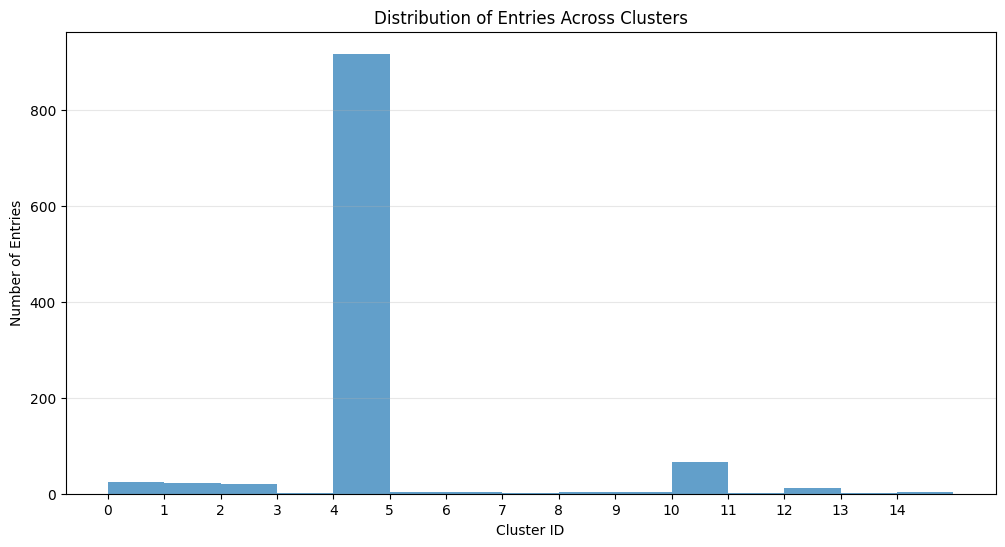


Clustering completed successfully!
Results saved to 'clustered_activities.csv'


In [113]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import re
from scipy.cluster.hierarchy import dendrogram

# Function to convert string representation of arrays to numpy arrays
def convert_string_to_array(string_array):
    try:
        # Check if it's already a numpy array or similar
        if isinstance(string_array, (np.ndarray, list)):
            return np.array(string_array)
        
        # Clean the string and extract numerical values using regex
        # This pattern matches floating point numbers with optional scientific notation
        pattern = r'[-+]?[0-9]*\.?[0-9]+(?:[eE][-+]?[0-9]+)?'
        values = re.findall(pattern, string_array)
        
        # Convert to float and return as numpy array
        return np.array([float(val) for val in values])
    except Exception as e:
        print(f"Error processing embedding: {e}")
        # Return zero array with estimated dimension (adjust based on your data)
        # Most embeddings are between 100-1024 dimensions
        return np.zeros(300)

# Function to process the dataframe
def process_dataframe_embeddings(df):
    # Create a copy to avoid modifying the original
    processed_df = df.copy()
    
    # Get a sample to determine embedding dimensions
    sample_str = processed_df['embeddings'].iloc[0]
    sample_vals = convert_string_to_array(sample_str)
    embedding_dim = len(sample_vals)
    print(f"Detected embedding dimension: {embedding_dim}")
    
    # Convert string embeddings to numpy arrays
    print("Converting embeddings from strings to arrays...")
    processed_df['embeddings_array'] = processed_df['embeddings'].apply(convert_string_to_array)
    processed_df['activity_embeddings_array'] = processed_df['activity_embeddings'].apply(convert_string_to_array)
    
    # Validate dimensions
    processed_df['embedding_dim'] = processed_df['embeddings_array'].apply(len)
    processed_df['activity_embedding_dim'] = processed_df['activity_embeddings_array'].apply(len)
    
    # Check for inconsistent dimensions
    if processed_df['embedding_dim'].nunique() > 1 or processed_df['activity_embedding_dim'].nunique() > 1:
        print("Warning: Inconsistent embedding dimensions detected!")
        print(f"Embedding dimensions: {processed_df['embedding_dim'].value_counts()}")
        print(f"Activity embedding dimensions: {processed_df['activity_embedding_dim'].value_counts()}")
        
        # Fill inconsistent arrays to match the modal dimension
        modal_dim = processed_df['embedding_dim'].mode()[0]
        
        def pad_or_truncate(arr, target_len):
            if len(arr) < target_len:
                return np.pad(arr, (0, target_len - len(arr)), 'constant')
            else:
                return arr[:target_len]
        
        processed_df['embeddings_array'] = processed_df['embeddings_array'].apply(
            lambda x: pad_or_truncate(x, modal_dim))
        processed_df['activity_embeddings_array'] = processed_df['activity_embeddings_array'].apply(
            lambda x: pad_or_truncate(x, modal_dim))
    
    # Choose which embeddings to use for clustering
    # For this example, we'll use activity_embeddings as they seem to represent the activity
    embedding_column = 'activity_embeddings_array'
    
    # Extract embeddings into a matrix
    print("Creating embedding matrix...")
    embedding_matrix = np.vstack(processed_df[embedding_column].values)
    
    # Check for NaN values
    if np.isnan(embedding_matrix).any():
        print("Warning: NaN values found in embeddings. Replacing with zeros.")
        embedding_matrix = np.nan_to_num(embedding_matrix)
    
    return processed_df, embedding_matrix

# Function to calculate cosine similarity matrix
def calculate_similarity_matrix(embedding_matrix):
    print("Calculating cosine similarity matrix...")
    similarity_matrix = cosine_similarity(embedding_matrix)
    # Convert to distance matrix (1 - similarity)
    distance_matrix = 1 - similarity_matrix
    return similarity_matrix, distance_matrix

# Function to perform hierarchical clustering
def perform_clustering(distance_matrix, n_clusters=10):
    print(f"Performing hierarchical clustering with {n_clusters} clusters...")
    # Use Agglomerative Clustering with cosine distance
    clustering = AgglomerativeClustering(
        n_clusters=n_clusters,
        affinity='precomputed',  # Use precomputed distances
        linkage='average'        # Use average linkage strategy
    )
    
    cluster_labels = clustering.fit_predict(distance_matrix)
    return clustering, cluster_labels

# Function to plot dendrogram (optional)
def plot_dendrogram(model, distance_matrix, max_d=0.5, truncate_mode='level', p=5):
    try:
        # Create linkage matrix for the dendrogram
        from scipy.cluster.hierarchy import linkage
        
        # Create linkage matrix for sample of data if too large
        if distance_matrix.shape[0] > 100:
            # Sample 100 data points for visualization
            indices = np.random.choice(distance_matrix.shape[0], 100, replace=False)
            sampled_distance = distance_matrix[np.ix_(indices, indices)]
            linkage_matrix = linkage(sampled_distance, method='average')
            title = 'Hierarchical Clustering Dendrogram (Sampled Data)'
        else:
            linkage_matrix = linkage(squareform(distance_matrix), method='average')
            title = 'Hierarchical Clustering Dendrogram'
        
        # Plot the dendrogram
        plt.figure(figsize=(12, 8))
        dendrogram(
            linkage_matrix,
            truncate_mode=truncate_mode,
            p=p,
            leaf_rotation=90.,
            leaf_font_size=8.,
            show_contracted=True,
            color_threshold=max_d
        )
        plt.title(title)
        plt.xlabel('Sample index or (cluster size)')
        plt.ylabel('Distance')
        plt.axhline(y=max_d, c='k', ls='--', lw=1)
        plt.show()
    except Exception as e:
        print(f"Could not generate dendrogram: {e}")
        print("Skipping dendrogram visualization...")

# Function to analyze and summarize clusters
def analyze_clusters(df, cluster_labels, top_n=5):
    # Add cluster labels to the dataframe
    df_with_clusters = df.copy()
    df_with_clusters['cluster'] = cluster_labels
    
    # Get number of clusters
    n_clusters = len(np.unique(cluster_labels))
    
    # Print summary of each cluster
    print(f"\nCluster Analysis (Total clusters: {n_clusters}):")
    cluster_summaries = []
    
    for cluster_id in range(n_clusters):
        # Get entries for this cluster
        cluster_df = df_with_clusters[df_with_clusters['cluster'] == cluster_id]
        cluster_size = len(cluster_df)
        
        # Skip empty clusters
        if cluster_size == 0:
            continue
            
        # Get most common activities in this cluster
        top_activities = cluster_df['activity'].value_counts().head(top_n)
        
        # Get most common fields in this cluster
        top_fields = cluster_df['field'].value_counts().head(top_n)
        
        # Calculate average similarity within cluster if possible
        avg_similarity = "N/A"
        try:
            if cluster_size > 1:
                embeddings = np.vstack(cluster_df['activity_embeddings_array'].values)
                similarity = cosine_similarity(embeddings)
                # Exclude self-similarity (diagonal)
                np.fill_diagonal(similarity, 0)
                avg_similarity = similarity.sum() / (cluster_size * (cluster_size - 1))
            else:
                avg_similarity = 1.0  # Single element cluster
        except Exception as e:
            print(f"Could not calculate average similarity for cluster {cluster_id}: {e}")
            
        # Get sample entries from this cluster
        sample_entries = cluster_df.sample(min(3, cluster_size))[['activity', 'description']]
        
        # Create cluster summary
        summary = {
            'cluster_id': cluster_id,
            'size': cluster_size,
            'avg_similarity': avg_similarity,
            'top_activities': top_activities,
            'top_fields': top_fields,
            'sample_entries': sample_entries
        }
        
        cluster_summaries.append(summary)
        
        # Print summary
        print(f"\nCluster {cluster_id} (Size: {cluster_size}, Avg Similarity: {avg_similarity if isinstance(avg_similarity, float) else 'N/A'})")
        print("Top Activities:")
        for activity, count in top_activities.items():
            print(f"  - {activity} ({count})")
        print("Top Fields:")
        for field, count in top_fields.items():
            print(f"  - {field} ({count})")
        print("Sample Entries:")
        for idx, entry in sample_entries.iterrows():
            print(f"  - {entry['activity']}: {entry['description'][:100]}...")
    
    return df_with_clusters, cluster_summaries

# Main execution function
def cluster_business_activities(df, n_clusters=15):
    # Process dataframe and get embedding matrix
    processed_df, embedding_matrix = process_dataframe_embeddings(df)
    
    # Calculate similarity matrix
    similarity_matrix, distance_matrix = calculate_similarity_matrix(embedding_matrix)
    
    # Perform clustering
    clustering_model, cluster_labels = perform_clustering(distance_matrix, n_clusters)
    
    # Analyze clusters
    df_with_clusters, cluster_summaries = analyze_clusters(processed_df, cluster_labels)
    
    # Return the enriched dataframe with cluster assignments
    return df_with_clusters, cluster_summaries, similarity_matrix

# Execute with a suggested number of clusters
# Adjust n_clusters as needed based on your data
def main(df, n_clusters=15):
    try:
        print(f"Starting clustering analysis on {len(df)} records...")
        df_clustered, summaries, similarity_matrix = cluster_business_activities(df, n_clusters)
        
        # Display cluster distribution
        plt.figure(figsize=(12, 6))
        plt.hist(df_clustered['cluster'], bins=range(df_clustered['cluster'].max()+2), alpha=0.7)
        plt.title('Distribution of Entries Across Clusters')
        plt.xlabel('Cluster ID')
        plt.ylabel('Number of Entries')
        plt.xticks(range(df_clustered['cluster'].max()+1))
        plt.grid(axis='y', alpha=0.3)
        plt.show()
        
        # Save results if needed
        df_clustered.to_csv('clustered_activities.csv', index=False)
        
        print("\nClustering completed successfully!")
        print(f"Results saved to 'clustered_activities.csv'")
        
        return df_clustered, summaries
    except Exception as e:
        print(f"Error in main function: {e}")
        import traceback
        traceback.print_exc()
        return None, None

# If running directly
if __name__ == "__main__":
    main(df)

## using the embeddings column

Starting clustering analysis on 1084 records...
Detected embedding dimension: 384
Converting embeddings from strings to arrays...
Creating embedding matrix...
Calculating cosine similarity matrix...
Performing hierarchical clustering with 15 clusters...

Cluster Analysis (Total clusters: 15):

Cluster 0 (Size: 6, Avg Similarity: 0.4005455192862944)
Top Activities:
  - English (1)
  - Traduction en Freelance (1)
  - Traduction free-lance (1)
  - doubleur voix (1)
  - communication interculturelle et interpretation (1)
Top Fields:
  - Conseil, Expertise et formation (3)
  - Services aux entreprises (1)
Sample Entries:
  - communication interculturelle et interpretation: La traduction ou l'interpretation des langues tout en tenant compte des nuances culturelles....
  - Traduction en Freelance: Traduction en Freelance...
  - English: It would be better if egnlish exist in this platform...

Cluster 1 (Size: 35, Avg Similarity: 0.3790811378927661)
Top Activities:
  - salle de jeux (2)
  - Ve

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


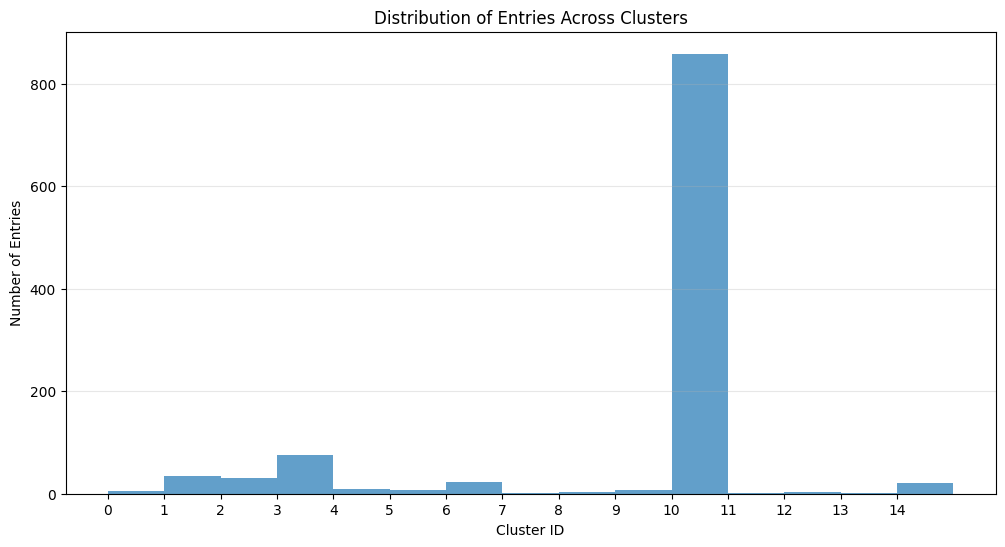


Clustering completed successfully!
Results saved to 'clustered_activities.csv'


In [114]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import re
from scipy.cluster.hierarchy import dendrogram

# Function to convert string representation of arrays to numpy arrays
def convert_string_to_array(string_array):
    try:
        # Check if it's already a numpy array or similar
        if isinstance(string_array, (np.ndarray, list)):
            return np.array(string_array)
        
        # Clean the string and extract numerical values using regex
        # This pattern matches floating point numbers with optional scientific notation
        pattern = r'[-+]?[0-9]*\.?[0-9]+(?:[eE][-+]?[0-9]+)?'
        values = re.findall(pattern, string_array)
        
        # Convert to float and return as numpy array
        return np.array([float(val) for val in values])
    except Exception as e:
        print(f"Error processing embedding: {e}")
        # Return zero array with estimated dimension (adjust based on your data)
        return np.zeros(300)

# Modified function to use only 'embeddings' (not 'activity_embeddings')
def process_dataframe_embeddings(df):
    # Create a copy to avoid modifying the original
    processed_df = df.copy()
    
    # Get a sample to determine embedding dimensions
    sample_str = processed_df['embeddings'].iloc[0]
    sample_vals = convert_string_to_array(sample_str)
    embedding_dim = len(sample_vals)
    print(f"Detected embedding dimension: {embedding_dim}")
    
    # Convert string embeddings to numpy arrays - only process 'embeddings' column
    print("Converting embeddings from strings to arrays...")
    processed_df['embeddings_array'] = processed_df['embeddings'].apply(convert_string_to_array)
    
    # Validate dimensions
    processed_df['embedding_dim'] = processed_df['embeddings_array'].apply(len)
    
    # Check for inconsistent dimensions
    if processed_df['embedding_dim'].nunique() > 1:
        print("Warning: Inconsistent embedding dimensions detected!")
        print(f"Embedding dimensions: {processed_df['embedding_dim'].value_counts()}")
        
        # Fill inconsistent arrays to match the modal dimension
        modal_dim = processed_df['embedding_dim'].mode()[0]
        
        def pad_or_truncate(arr, target_len):
            if len(arr) < target_len:
                return np.pad(arr, (0, target_len - len(arr)), 'constant')
            else:
                return arr[:target_len]
        
        processed_df['embeddings_array'] = processed_df['embeddings_array'].apply(
            lambda x: pad_or_truncate(x, modal_dim))
    
    # Use only 'embeddings' for clustering
    embedding_column = 'embeddings_array'
    
    # Extract embeddings into a matrix
    print("Creating embedding matrix...")
    embedding_matrix = np.vstack(processed_df[embedding_column].values)
    
    # Check for NaN values
    if np.isnan(embedding_matrix).any():
        print("Warning: NaN values found in embeddings. Replacing with zeros.")
        embedding_matrix = np.nan_to_num(embedding_matrix)
    
    return processed_df, embedding_matrix

# Function to calculate cosine similarity matrix
def calculate_similarity_matrix(embedding_matrix):
    print("Calculating cosine similarity matrix...")
    similarity_matrix = cosine_similarity(embedding_matrix)
    # Convert to distance matrix (1 - similarity)
    distance_matrix = 1 - similarity_matrix
    return similarity_matrix, distance_matrix

# Function to perform hierarchical clustering
def perform_clustering(distance_matrix, n_clusters=10):
    print(f"Performing hierarchical clustering with {n_clusters} clusters...")
    # Use Agglomerative Clustering with cosine distance
    clustering = AgglomerativeClustering(
        n_clusters=n_clusters,
        affinity='precomputed',  # Use precomputed distances
        linkage='average'        # Use average linkage strategy
    )
    
    cluster_labels = clustering.fit_predict(distance_matrix)
    return clustering, cluster_labels

# Function to analyze and summarize clusters
def analyze_clusters(df, cluster_labels, top_n=5):
    # Add cluster labels to the dataframe
    df_with_clusters = df.copy()
    df_with_clusters['cluster'] = cluster_labels
    
    # Get number of clusters
    n_clusters = len(np.unique(cluster_labels))
    
    # Print summary of each cluster
    print(f"\nCluster Analysis (Total clusters: {n_clusters}):")
    cluster_summaries = []
    
    for cluster_id in range(n_clusters):
        # Get entries for this cluster
        cluster_df = df_with_clusters[df_with_clusters['cluster'] == cluster_id]
        cluster_size = len(cluster_df)
        
        # Skip empty clusters
        if cluster_size == 0:
            continue
            
        # Get most common activities in this cluster
        top_activities = cluster_df['activity'].value_counts().head(top_n)
        
        # Get most common fields in this cluster
        top_fields = cluster_df['field'].value_counts().head(top_n)
        
        # Calculate average similarity within cluster if possible
        avg_similarity = "N/A"
        try:
            if cluster_size > 1:
                embeddings = np.vstack(cluster_df['embeddings_array'].values)  # Using embeddings_array
                similarity = cosine_similarity(embeddings)
                # Exclude self-similarity (diagonal)
                np.fill_diagonal(similarity, 0)
                avg_similarity = similarity.sum() / (cluster_size * (cluster_size - 1))
            else:
                avg_similarity = 1.0  # Single element cluster
        except Exception as e:
            print(f"Could not calculate average similarity for cluster {cluster_id}: {e}")
            
        # Get sample entries from this cluster
        sample_entries = cluster_df.sample(min(3, cluster_size))[['activity', 'description']]
        
        # Create cluster summary
        summary = {
            'cluster_id': cluster_id,
            'size': cluster_size,
            'avg_similarity': avg_similarity,
            'top_activities': top_activities,
            'top_fields': top_fields,
            'sample_entries': sample_entries
        }
        
        cluster_summaries.append(summary)
        
        # Print summary
        print(f"\nCluster {cluster_id} (Size: {cluster_size}, Avg Similarity: {avg_similarity if isinstance(avg_similarity, float) else 'N/A'})")
        print("Top Activities:")
        for activity, count in top_activities.items():
            print(f"  - {activity} ({count})")
        print("Top Fields:")
        for field, count in top_fields.items():
            print(f"  - {field} ({count})")
        print("Sample Entries:")
        for idx, entry in sample_entries.iterrows():
            print(f"  - {entry['activity']}: {entry['description'][:100]}...")
    
    return df_with_clusters, cluster_summaries

# Main execution function
def cluster_business_activities(df, n_clusters=15):
    # Process dataframe and get embedding matrix
    processed_df, embedding_matrix = process_dataframe_embeddings(df)
    
    # Calculate similarity matrix
    similarity_matrix, distance_matrix = calculate_similarity_matrix(embedding_matrix)
    
    # Perform clustering
    clustering_model, cluster_labels = perform_clustering(distance_matrix, n_clusters)
    
    # Analyze clusters
    df_with_clusters, cluster_summaries = analyze_clusters(processed_df, cluster_labels)
    
    # Return the enriched dataframe with cluster assignments
    return df_with_clusters, cluster_summaries, similarity_matrix

# Execute with a suggested number of clusters
def main(df, n_clusters=15):
    try:
        print(f"Starting clustering analysis on {len(df)} records...")
        df_clustered, summaries, similarity_matrix = cluster_business_activities(df, n_clusters)
        
        # Display cluster distribution
        plt.figure(figsize=(12, 6))
        plt.hist(df_clustered['cluster'], bins=range(df_clustered['cluster'].max()+2), alpha=0.7)
        plt.title('Distribution of Entries Across Clusters')
        plt.xlabel('Cluster ID')
        plt.ylabel('Number of Entries')
        plt.xticks(range(df_clustered['cluster'].max()+1))
        plt.grid(axis='y', alpha=0.3)
        plt.show()
        
        # Save results if needed
        df_clustered.to_csv('clustered_activities.csv', index=False)
        
        print("\nClustering completed successfully!")
        print(f"Results saved to 'clustered_activities.csv'")
        
        return df_clustered, summaries
    except Exception as e:
        print(f"Error in main function: {e}")
        import traceback
        traceback.print_exc()
        return None, None

# If running directly
if __name__ == "__main__":
    main(df)

In [121]:
!pip install umap hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.8 MB/s eta 0:00:00a 0:00:01


In [123]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
import umap
import hdbscan
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming embedding_matrix is the matrix of embeddings (shape: [n_samples, embedding_dim])
# Assuming df contains the suggestions with their embeddings

def umap_hdbscan_clustering(embedding_matrix, n_neighbors=15, min_cluster_size=5):
    """
    Clustering using UMAP + HDBSCAN for high-dimensional text embeddings.
    
    Args:
        embedding_matrix: Matrix of embeddings (n_samples x embedding_dim)
        n_neighbors: UMAP parameter controlling local versus global structure preservation
        min_cluster_size: Minimum size for a cluster in HDBSCAN
    """
    print("Reducing dimensions with UMAP...")
    umap_reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        n_components=5,  # Reduce to 5 dimensions (or tweak based on dataset)
        metric='cosine',
        random_state=42
    )
    umap_embeddings = umap_reducer.fit_transform(embedding_matrix)
    
    print("Clustering with HDBSCAN...")
    hdbscan_clusterer = hdbscan.HDBSCAN(
        min_cluster_size=min_cluster_size,
        min_samples=1,
        metric='euclidean',
        prediction_data=True
    )
    cluster_labels = hdbscan_clusterer.fit_predict(umap_embeddings)
    
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    n_noise = list(cluster_labels).count(-1)
    
    print(f"UMAP + HDBSCAN found {n_clusters} clusters and {n_noise} noise points")
    
    return cluster_labels, hdbscan_clusterer, umap_embeddings


def visualize_clusters(umap_embeddings, cluster_labels):
    """
    Visualize the clusters in 2D space using t-SNE.

    Args:
        umap_embeddings: Reduced embeddings from UMAP
        cluster_labels: Cluster labels assigned by HDBSCAN
    """
    print("Visualizing clusters using t-SNE...")
    tsne = TSNE(n_components=2, random_state=42, metric='euclidean')
    tsne_embeddings = tsne.fit_transform(umap_embeddings)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cluster_labels, cmap='Spectral', alpha=0.7)
    plt.colorbar(scatter)
    plt.title("t-SNE visualization of clusters")
    plt.show()


def optimized_embedding_clustering(df, embedding_matrix):
    """
    Comprehensive approach for clustering text embeddings using UMAP + HDBSCAN.
    
    Args:
        df: DataFrame with user suggestions (with original text)
        embedding_matrix: The matrix of text embeddings
        
    Returns:
        df: DataFrame with cluster labels added
        cluster_analysis: (optional) Further analysis or insights on clusters
    """
    # Normalize embeddings (important for cosine similarity)
    normalized_embeddings = normalize(embedding_matrix)

    # Apply UMAP + HDBSCAN for clustering
    cluster_labels, hdbscan_clusterer, umap_embeddings = umap_hdbscan_clustering(
        normalized_embeddings,
        n_neighbors=15,
        min_cluster_size=5
    )
    
    # Add cluster labels to the original DataFrame
    df['cluster'] = cluster_labels
    
    # Visualize the clusters
    visualize_clusters(umap_embeddings, cluster_labels)

    # Optionally, you can also analyze clusters by checking the coherence of the grouped texts
    cluster_analysis = analyze_clusters(df)  # Implement your own analysis logic here
    
    return df, cluster_analysis


def analyze_clusters(df):
    """
    Analyze clusters by evaluating semantic coherence or other domain-specific metrics.

    Args:
        df: DataFrame with the cluster labels
    
    Returns:
        analysis: Any analysis or insights derived from the clusters
    """
    analysis = {}
    for cluster_id in set(df['cluster']):
        if cluster_id == -1:
            continue  # Skip noise points
        
        cluster_df = df[df['cluster'] == cluster_id]
        analysis[cluster_id] = {
            'cluster_size': len(cluster_df),
            'example_texts': cluster_df['suggestion'].head(3).tolist()  # Show example texts from the cluster
        }
    
    return analysis

# Example usage:
# Assuming df contains user suggestions and `embedding_matrix` is already created from the embeddings
# df = pd.read_csv('user_suggestions.csv')  # Load your data
# embedding_matrix = np.array([...])  # Your embedding matrix here
df, cluster_analysis = optimized_embedding_clustering(df, embedding_matrix)
print(cluster_analysis)


In [116]:
processed_df ,embedding_matrix = process_dataframe_embeddings(df)
embedding_matrix

Detected embedding dimension: 384
Converting embeddings from strings to arrays...
Creating embedding matrix...


array([[-0.03173156,  0.09627616,  0.08533049, ...,  0.13193122,
         0.03254908,  0.15392196],
       [ 0.00757149, -0.09761564,  0.01141421, ..., -0.18191074,
         0.30836436,  0.04855084],
       [-0.03646741, -0.10948665, -0.07891633, ...,  0.08682334,
        -0.02741647,  0.10549551],
       ...,
       [-0.06062963, -0.1416263 ,  0.15020481, ..., -0.05453555,
         0.16300341, -0.168351  ],
       [-0.16202272,  0.141652  , -0.16431801, ..., -0.05748697,
         0.11112632,  0.12965058],
       [-0.222653  ,  0.24654959, -0.29414183, ..., -0.1482624 ,
         0.2049322 ,  0.34066364]])

In [129]:
!pip uninstall umap



Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/umap-0.1.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/umap/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.10/dist-packages/umap/aligned_umap.py
    /usr/local/lib/python3.10/dist-packages/umap/distances.py
    /usr/local/lib/python3.10/dist-packages/umap/layouts.py
    /usr/local/lib/python3.10/dist-packages/umap/parametric_umap.py
    /usr/local/lib/python3.10/dist-packages/umap/plot.py
    /usr/local/lib/python3.10/dist-packages/umap/sparse.py
    /usr/local/lib/python3.10/dist-packages/umap/spectral.py
    /usr/local/lib/python3.10/dist-packages/umap/umap_.py
    /usr/local/lib/python3.10/dist-packages/umap/utils.py
    /usr/local/lib/python3.10/dist-packages/umap/validation.py
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
